### Plot the fraction of SIR during the dynamic

In [1]:
import csv
import configparser
import numpy

import matplotlib.pyplot as plt
import networkx as nx

from operator import itemgetter
from os import listdir
from os.path import isfile, isdir, join, exists

In [2]:
plt.rcParams['figure.figsize'] = [10,5]

In [3]:
EmailURV = '../../src/datasets/EmailURV/EmailURV.csv'
Emailcontacts = '../../src/datasets/Emailcontacts/Emailcontacts.csv'

G = nx.Graph()
with open(EmailURV, 'r') as file:
    reader = csv.reader(file, delimiter=",")
    for row in reader:
        G.add_edge(int(row[0]), int(row[1]))
N_AGENTS = len(G.nodes())
N_USERS = N_AGENTS

In [4]:
time = 200

In [5]:
mypath = '../../log/TestingPowerlaw/'
dirs = [f for f in listdir(mypath) if isdir(join(mypath, f))]
memlogs = [join(join(mypath, f), 'memoryLog.csv') for f in dirs]
memlogs

['../../log/TestingPowerlaw/2019_25_02_16_08_37/memoryLog.csv',
 '../../log/TestingPowerlaw/2019_25_02_15_43_45/memoryLog.csv',
 '../../log/TestingPowerlaw/2019_25_02_15_42_28/memoryLog.csv',
 '../../log/TestingPowerlaw/2019_26_02_10_05_00/memoryLog.csv',
 '../../log/TestingPowerlaw/2019_25_02_15_58_04/memoryLog.csv',
 '../../log/TestingPowerlaw/2019_25_02_16_00_16/memoryLog.csv',
 '../../log/TestingPowerlaw/2019_25_02_15_42_22/memoryLog.csv',
 '../../log/TestingPowerlaw/2019_25_02_15_49_08/memoryLog.csv',
 '../../log/TestingPowerlaw/2019_25_02_16_09_56/memoryLog.csv',
 '../../log/TestingPowerlaw/2019_26_02_10_04_49/memoryLog.csv',
 '../../log/TestingPowerlaw/2019_25_02_15_53_05/memoryLog.csv',
 '../../log/TestingPowerlaw/2019_26_02_10_04_48/memoryLog.csv',
 '../../log/TestingPowerlaw/2019_25_02_15_45_49/memoryLog.csv',
 '../../log/TestingPowerlaw/2019_25_02_16_08_00/memoryLog.csv',
 '../../log/TestingPowerlaw/2019_25_02_15_44_45/memoryLog.csv',
 '../../log/TestingPowerlaw/2019_25_02_1

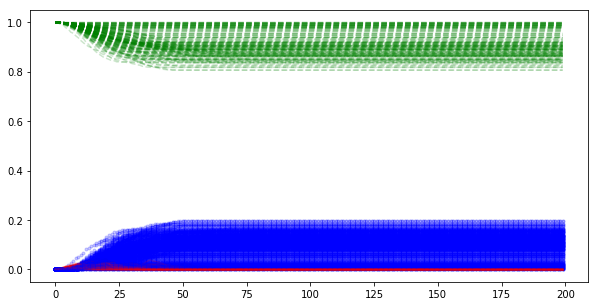

In [6]:
counter = 0
for file in memlogs:
    time_SIR_frac = [[0,0,0]]*(time + 1)
    time_SIR_frac = numpy.array(time_SIR_frac)
    SIR_dict = {'s' : 0, 'i':1, 'r': 2}

    with open(file, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        for row in spamreader:
            if '#' in row[0]: continue
            if 'agent' in row: continue
            try:
                time_SIR_frac[int(float(row[1]))][SIR_dict[row[3]]] +=1
            except IndexError as e:
                print(e)
                print(row)
                break

        #list_of_tup.append((int(row[0]), int(row[1]), row[2], int(row[3])))
        #listup = [e[3] for e in [element for element in list_of_tup if element[2] == 'u']]
        #listdown = [e[3] for e in [element for element in list_of_tup if element[2] == 'd']]

        x = time_SIR_frac[1:] / N_USERS 
        t = range(time)
        #if all(i >= 0.99 for i in [e[0] for e in x]) :
        #    counter += 1
        #    print("lost graphs:", counter/len(memlogs), "%")
        #    continue
        #plt.figure()
        plt.plot(t, [e[0] for e in x], 'g--', alpha=0.2)
        plt.plot(t, [e[1] for e in x], 'r-', alpha=0.2)
        plt.plot(t, [e[2] for e in x], 'b.', alpha=0.2)
        plt.show